In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in /opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages (0.0)


In [2]:
# install joblib for saving
# Restart kernel after installing 
!pip install joblib

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint

In [4]:
#Messed up the path somehow (duplicated file and placed in same folder)
df = pd.read_csv("ml_compile.csv")

In [5]:
df['year'] = pd.DatetimeIndex(df['year_month']).year
df['month']= pd.DatetimeIndex(df['year_month']).month

# Machine Learning: Climate x Mobility

In [6]:
df = df [['land_avg_temp', 'land_max_temp', 'land_min_temp',
       'land_ocean_avg_temp', 'north_min_temp_anomoly',
       'north_max_temp_anomoly', 'north_mean_temp_anomoly', 'global_avg_co2',
       'seaice_extent',
       'avg_distance_traveled', 'year','month']]

In [7]:
#Drop null values
df.describe()

,land_avg_temp,land_max_temp,land_min_temp,land_ocean_avg_temp,north_min_temp_anomoly,north_max_temp_anomoly,north_mean_temp_anomoly,global_avg_co2,seaice_extent,avg_distance_traveled,year,month
count,1392.000000,1392.000000,1392.000000,1392.000000,1428.000000,1434.000000,1446.000000,752.000000,506.000000,8.400000e+01,1450.000000,1450.000000
mean,8.762454,14.516995,3.000047,15.317030,0.122602,0.213536,0.213620,355.582926,11.405146,5.916332e+08,1959.917241,6.493103
std,4.199958,4.294911,4.114758,1.259405,0.709268,0.620087,0.630979,28.949294,3.252910,6.769937e+08,34.893410,3.450571
min,1.395000,7.082000,-4.298000,12.839000,-1.951000,-1.772000,-1.647000,312.430000,3.565600,1.784230e+05,1900.000000,1.000000
25%,4.655750,10.426250,-1.103250,14.150750,-0.354250,-0.184750,-0.198000,329.112500,8.571152,1.296206e+08,1930.000000,3.250000
50%,9.087500,14.899000,3.213500,15.373000,0.022500,0.140500,0.098000,352.880000,12.095933,2.588397e+08,1960.000000,6.000000
75%,12.953000,18.867000,7.048000,16.477750,0.583250,0.563500,0.576500,378.857500,14.318582,9.286488e+08,1990.000000,9.000000
max,15.482000,21.320000,9.715000,17.611000,2.970000,2.805000,2.877000,417.070000,16.341938,2.617030e+09,2020.000000,12.000000


In [8]:
df = df.dropna(axis = 0)
df.describe()

,land_avg_temp,land_max_temp,land_min_temp,land_ocean_avg_temp,north_min_temp_anomoly,north_max_temp_anomoly,north_mean_temp_anomoly,global_avg_co2,seaice_extent,avg_distance_traveled,year,month
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,8.100000e+01,81.000000,81.000000
mean,9.790259,15.556259,4.089877,15.928580,1.164457,1.116765,1.111099,394.353704,10.562315,6.017928e+08,2012.111111,6.666667
std,4.163228,4.280008,4.030000,1.244731,0.375582,0.387919,0.372216,4.791289,3.476053,6.840158e+08,1.962142,3.420526
min,3.157000,8.691000,-2.233000,13.859000,0.158000,-0.055000,-0.008000,384.430000,3.565600,1.784230e+05,2009.000000,1.000000
25%,6.101000,12.025000,0.287000,14.863000,0.923000,0.833000,0.879000,390.280000,7.454839,1.324565e+08,2010.000000,4.000000
50%,10.256000,15.994000,4.663000,15.962000,1.111000,1.144000,1.112000,394.190000,11.320267,2.650700e+08,2012.000000,7.000000
75%,14.201000,20.056000,8.300000,17.203000,1.381000,1.302000,1.301000,398.010000,13.729419,9.822863e+08,2014.000000,10.000000
max,15.482000,21.320000,9.684000,17.611000,2.355000,2.181000,2.026000,403.960000,15.196258,2.617030e+09,2015.000000,12.000000


## Preprocessing the Data

### Assign X(features) and y(target) data

In [9]:
X = df[['year', 'month','land_avg_temp',
       'land_ocean_avg_temp', 'global_avg_co2',
       'seaice_extent']]
y = df["avg_distance_traveled"].values.reshape(-1, 1)

print(X.shape, y.shape)

(81, 6) (81, 1)


### Split the data into testing and training dataset

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# X_train, X_test, y_var_train, y_var_test = train_test_split(X, y_var, test_size=0.2, random_state=42)

### MinMaxScalar to fit and transform X features and y target

In [11]:
#Fit Transform using MinMaxScalar for X features
from sklearn.preprocessing import MinMaxScaler
X_minmax = MinMaxScaler().fit(X_train)
y_minmax = MinMaxScaler().fit(y_train)

X_train_minmax = X_minmax.transform(X_train)
X_test_minmax = X_minmax.transform(X_test)

#Target value #1
y_train_minmax = y_minmax.transform(y_train)
y_test_minmax = y_minmax.transform(y_test)

## Multiple Linear Regression Analysis
### Resource Selection Factor Mean

In [12]:
# Creat model and fit to scaled training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_minmax, y_train_minmax)

LinearRegression()

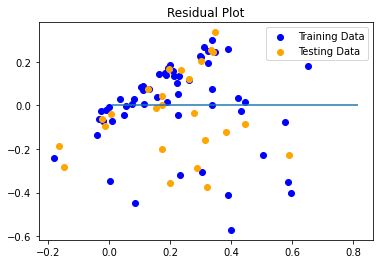

In [13]:
# Make Prediction using a FIT model and plot ==SEE BELOW FOR ALTERNATIVES==
predictions = model.predict(X_test_minmax)
model.fit(X_train_minmax, y_train_minmax)

plt.scatter(model.predict(X_train_minmax), model.predict(X_train_minmax) - y_train_minmax, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_minmax), model.predict(X_test_minmax) - y_test_minmax, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_minmax.min(), xmax=y_test_minmax.max())
plt.title("Residual Plot")
plt.show()

In [14]:
# Validate the Model with MSE and R2
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_minmax, predictions)
r2 = model.score(X_test_minmax, y_test_minmax)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.039051946373931896, R2: 0.3038044689929619


## Categorical Algorithms
### Preprocessing - Transform RSF values to Categorical

In [15]:
df["avg_distance_traveled"].describe()

count    8.100000e+01
mean     6.017928e+08
std      6.840158e+08
min      1.784230e+05
25%      1.324565e+08
50%      2.650700e+08
75%      9.822863e+08
max      2.617030e+09
Name: avg_distance_traveled, dtype: float64

In [16]:
conditions = [(df["avg_distance_traveled"] < 1.5e+08 ), (df["avg_distance_traveled"] > 1.5e+08 ) & (df["avg_distance_traveled"] < 8e+08 ), (df["avg_distance_traveled"] > 8e+08)]
values = ['low', 'mid', 'high']
df["avg_distance_traveled"] = np.select(conditions,values)

In [18]:
df_cat = df [['year', 'month', 'land_avg_temp', 
       'land_ocean_avg_temp', 'global_avg_co2',
       'seaice_extent','avg_distance_traveled']]

### Assign new variables

In [19]:
X = df_cat[['year', 'month', 'land_avg_temp', 
       'land_ocean_avg_temp', 'global_avg_co2',
       'seaice_extent']]
y_cat = df_cat["avg_distance_traveled"]
print(X.shape, y_cat.shape)

(81, 6) (81,)


### Split the data into testing and training dataset

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_cat_train, y_cat_test = train_test_split(X, y_cat, test_size=0.5, random_state=42)

### MinMaxScalar to fit and transform X features and y target

In [21]:
#Fit Transform using MinMaxScalar for X features
from sklearn.preprocessing import MinMaxScaler
X_minmax = MinMaxScaler().fit(X_train)

X_train_minmax = X_minmax.transform(X_train)
X_test_minmax = X_minmax.transform(X_test)

## 1. Logistic Regression Analysis

In [22]:
# Creat model and fit to scaled training data
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_minmax, y_cat_train)
print(f"Training Data Score: {classifier.score(X_train, y_cat_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_cat_test)}")

Training Data Score: 0.35
Testing Data Score: 0.43902439024390244


## 2. Random Forest Analysis

In [23]:
from sklearn.ensemble import RandomForestClassifier
y_cat_rf = df_cat["avg_distance_traveled"]

rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train_minmax, y_cat_train)
score = rf.score(X_test_minmax, y_cat_test)

In [24]:
importances = rf.feature_importances_
sorted(zip(rf.feature_importances_, X.columns), reverse=True)

[(0.19752755908328926, 'seaice_extent'),
 (0.18365242991078984, 'year'),
 (0.17672542102832217, 'global_avg_co2'),
 (0.15302067352547383, 'land_ocean_avg_temp'),
 (0.1473847881418934, 'month'),
 (0.14168912831023153, 'land_avg_temp')]

In [25]:
print(f"Random Forest Testing Score: {score}")

Random Forest Testing Score: 0.7804878048780488


### hypertune the model

In [ ]:
rf.get_params().keys()

In [1]:
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 3)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

NameError: name 'np' is not defined

### Label encoding y_cat

In [26]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(y_cat_train)

encoded_y_train = label_encoder.transform(y_cat_train)
encoded_y_test = label_encoder.transform(y_cat_test)

In [27]:
from sklearn.ensemble import RandomForestRegressor
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(X_train_minmax, encoded_y_train)

NameError: name 'RandomizedSearchCV' is not defined

In [28]:
rf_random.best_params_

NameError: name 'rf_random' is not defined

In [29]:
rf2 = RandomForestClassifier(n_estimators=2000, min_samples_split =2, min_samples_leaf = 1, max_features='sqrt', max_depth=10, bootstrap='True')
rf2 = rf2.fit(X_train_minmax, encoded_y_train)
score = rf2.score(X_test_minmax, encoded_y_test)

print(f"Random Forest Testing Score: {score}")

Random Forest Testing Score: 0.7560975609756098


In [31]:
import pickle
pickle.dump(rf2, open("../../models/rf_mob.pkl", "wb"))

In [32]:
with open("../../models/rf_mob.pkl", "rb") as f:
    model_object = pickle.load(f)
    f.close()

## 3. Mobility KNN

k: 1, Train/Test Score: 1.000/0.537
k: 3, Train/Test Score: 0.575/0.659
k: 5, Train/Test Score: 0.575/0.659
k: 7, Train/Test Score: 0.625/0.537
k: 9, Train/Test Score: 0.525/0.439
k: 11, Train/Test Score: 0.525/0.390
k: 13, Train/Test Score: 0.525/0.439
k: 15, Train/Test Score: 0.525/0.463
k: 17, Train/Test Score: 0.400/0.390
k: 19, Train/Test Score: 0.500/0.366


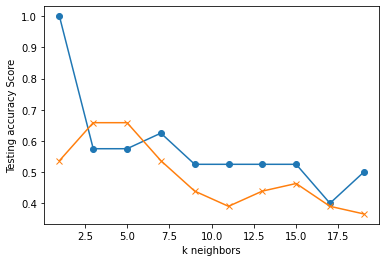

In [33]:
from sklearn.neighbors import KNeighborsClassifier

train_scores = []
test_scores = []
for k in range (1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_minmax, y_cat_train)
    train_score = knn.score(X_train_minmax, y_cat_train)
    test_score = knn.score(X_test_minmax, y_cat_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [34]:
#STEP 5: re-fit classifier with optimal k value
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_minmax, y_cat_train)
print("k=5 Test Acc: %.3f" %knn.score(X_test_minmax, y_cat_test))

k=5 Test Acc: 0.659


In [35]:
import pickle
pickle.dump(knn, open("../../knn_mob.pkl", "wb"))

In [36]:
with open("../../knn_mob.pkl", "rb") as f:
    model_object = pickle.load(f)
    f.close()